# AgeDB Data Preparation Notebook

The dataset is structured as follows:

```text
AgeDB:
|---0_MariaCallas_35_f.jpg
|---1_MariaCallas_40_f.jpg
|---...


The labels are contained within the name of the image file and is encoded as follows:
ImageID_PersonName_Age_Gender.jpg

The dataset will be organized such that all the images are contained within an Images folder and a labels.csv file will hold the labels.

In [1]:
import os, numpy as np, shutil, matplotlib.pyplot as plt, pandas as pd
os.chdir('..')

In [2]:
output_dir = os.path.join('data', 'datasets', 'age gender and race estimation', 'AgeDB')
os.path.exists(output_dir)

True

In [3]:
old_images_path = os.path.join(output_dir, 'AgeDB')
os.path.exists(old_images_path)

True

In [4]:
new_images_path = os.path.join(output_dir, 'Images')
os.makedirs(new_images_path, exist_ok = True)

In [5]:
ids = []
identities = []
ages = []
genders = []
old_image_names = []
for image in os.listdir(old_images_path):
    cleaned_image = image.replace('.jpg', '')
    id, identity, age, gender = cleaned_image.split('_')

    id = int(id)
    age = int(age)
    gender = 1 if gender == 'm' else 0 # male = 1, female = 0

    ids.append(id)
    identities.append(identity)
    ages.append(age)
    genders.append(gender)
    old_image_names.append(image)
    

# sort based on the ids
sorted_idx = np.argsort(ids)
ids = [ids[i] for i in sorted_idx]
identities = [identities[i] for i in sorted_idx]
ages = [ages[i] for i in sorted_idx]
genders = [genders[i] for i in sorted_idx]
old_image_names = [old_image_names[i] for i in sorted_idx]


In [6]:
# convert the identities into numerical format
unique_identities = {}
i = 0
for identity in identities:
    if identity not in unique_identities.keys():
        unique_identities[identity] = i
        i+=1



In [7]:
for i in range(len(ids)): 

    print(old_image_names[i], ids[i], identities[i] + f' ({unique_identities[identities[i]]})', ages[i], genders[i], sep = ' :: ') # sanity check

0_MariaCallas_35_f.jpg :: 0 :: MariaCallas (0) :: 35 :: 0
1_MariaCallas_40_f.jpg :: 1 :: MariaCallas (0) :: 40 :: 0
2_MariaCallas_33_f.jpg :: 2 :: MariaCallas (0) :: 33 :: 0
3_MariaCallas_35_f.jpg :: 3 :: MariaCallas (0) :: 35 :: 0
4_MariaCallas_41_f.jpg :: 4 :: MariaCallas (0) :: 41 :: 0
5_MariaCallas_34_f.jpg :: 5 :: MariaCallas (0) :: 34 :: 0
6_MariaCallas_31_f.jpg :: 6 :: MariaCallas (0) :: 31 :: 0
7_MariaCallas_41_f.jpg :: 7 :: MariaCallas (0) :: 41 :: 0
8_MariaCallas_33_f.jpg :: 8 :: MariaCallas (0) :: 33 :: 0
9_MariaCallas_30_f.jpg :: 9 :: MariaCallas (0) :: 30 :: 0
10_MariaCallas_28_f.jpg :: 10 :: MariaCallas (0) :: 28 :: 0
11_MariaCallas_39_f.jpg :: 11 :: MariaCallas (0) :: 39 :: 0
12_MariaCallas_37_f.jpg :: 12 :: MariaCallas (0) :: 37 :: 0
13_MariaCallas_53_f.jpg :: 13 :: MariaCallas (0) :: 53 :: 0
14_MariaCallas_32_f.jpg :: 14 :: MariaCallas (0) :: 32 :: 0
15_MariaCallas_42_f.jpg :: 15 :: MariaCallas (0) :: 42 :: 0
16_MariaCallas_34_f.jpg :: 16 :: MariaCallas (0) :: 34 :: 0


In [8]:
new_image_names = []
for i in range(len(ids)):
    # copy the old images into the new Images folder
    new_name = f'{i}.jpg'
    shutil.copy(
        src = os.path.join(old_images_path, old_image_names[i]),
        dst = os.path.join(new_images_path, new_name)
    )

    new_image_names.append(new_name)



In [9]:

labels_df = pd.DataFrame(
    data = {
        'filename' : new_image_names,
        'age' : ages,
        'gender' : genders,
    }
)

labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

## EDA

In [5]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [6]:
np.unique(labels_df['age'])

array([  1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101])

In [7]:
labels_df.head()

,filename,age,gender
0,0.jpg,35,0
1,1.jpg,40,0
2,2.jpg,33,0
3,3.jpg,35,0
4,4.jpg,41,0


In [8]:
genders, counts = np.unique(labels_df['gender'], return_counts = True)

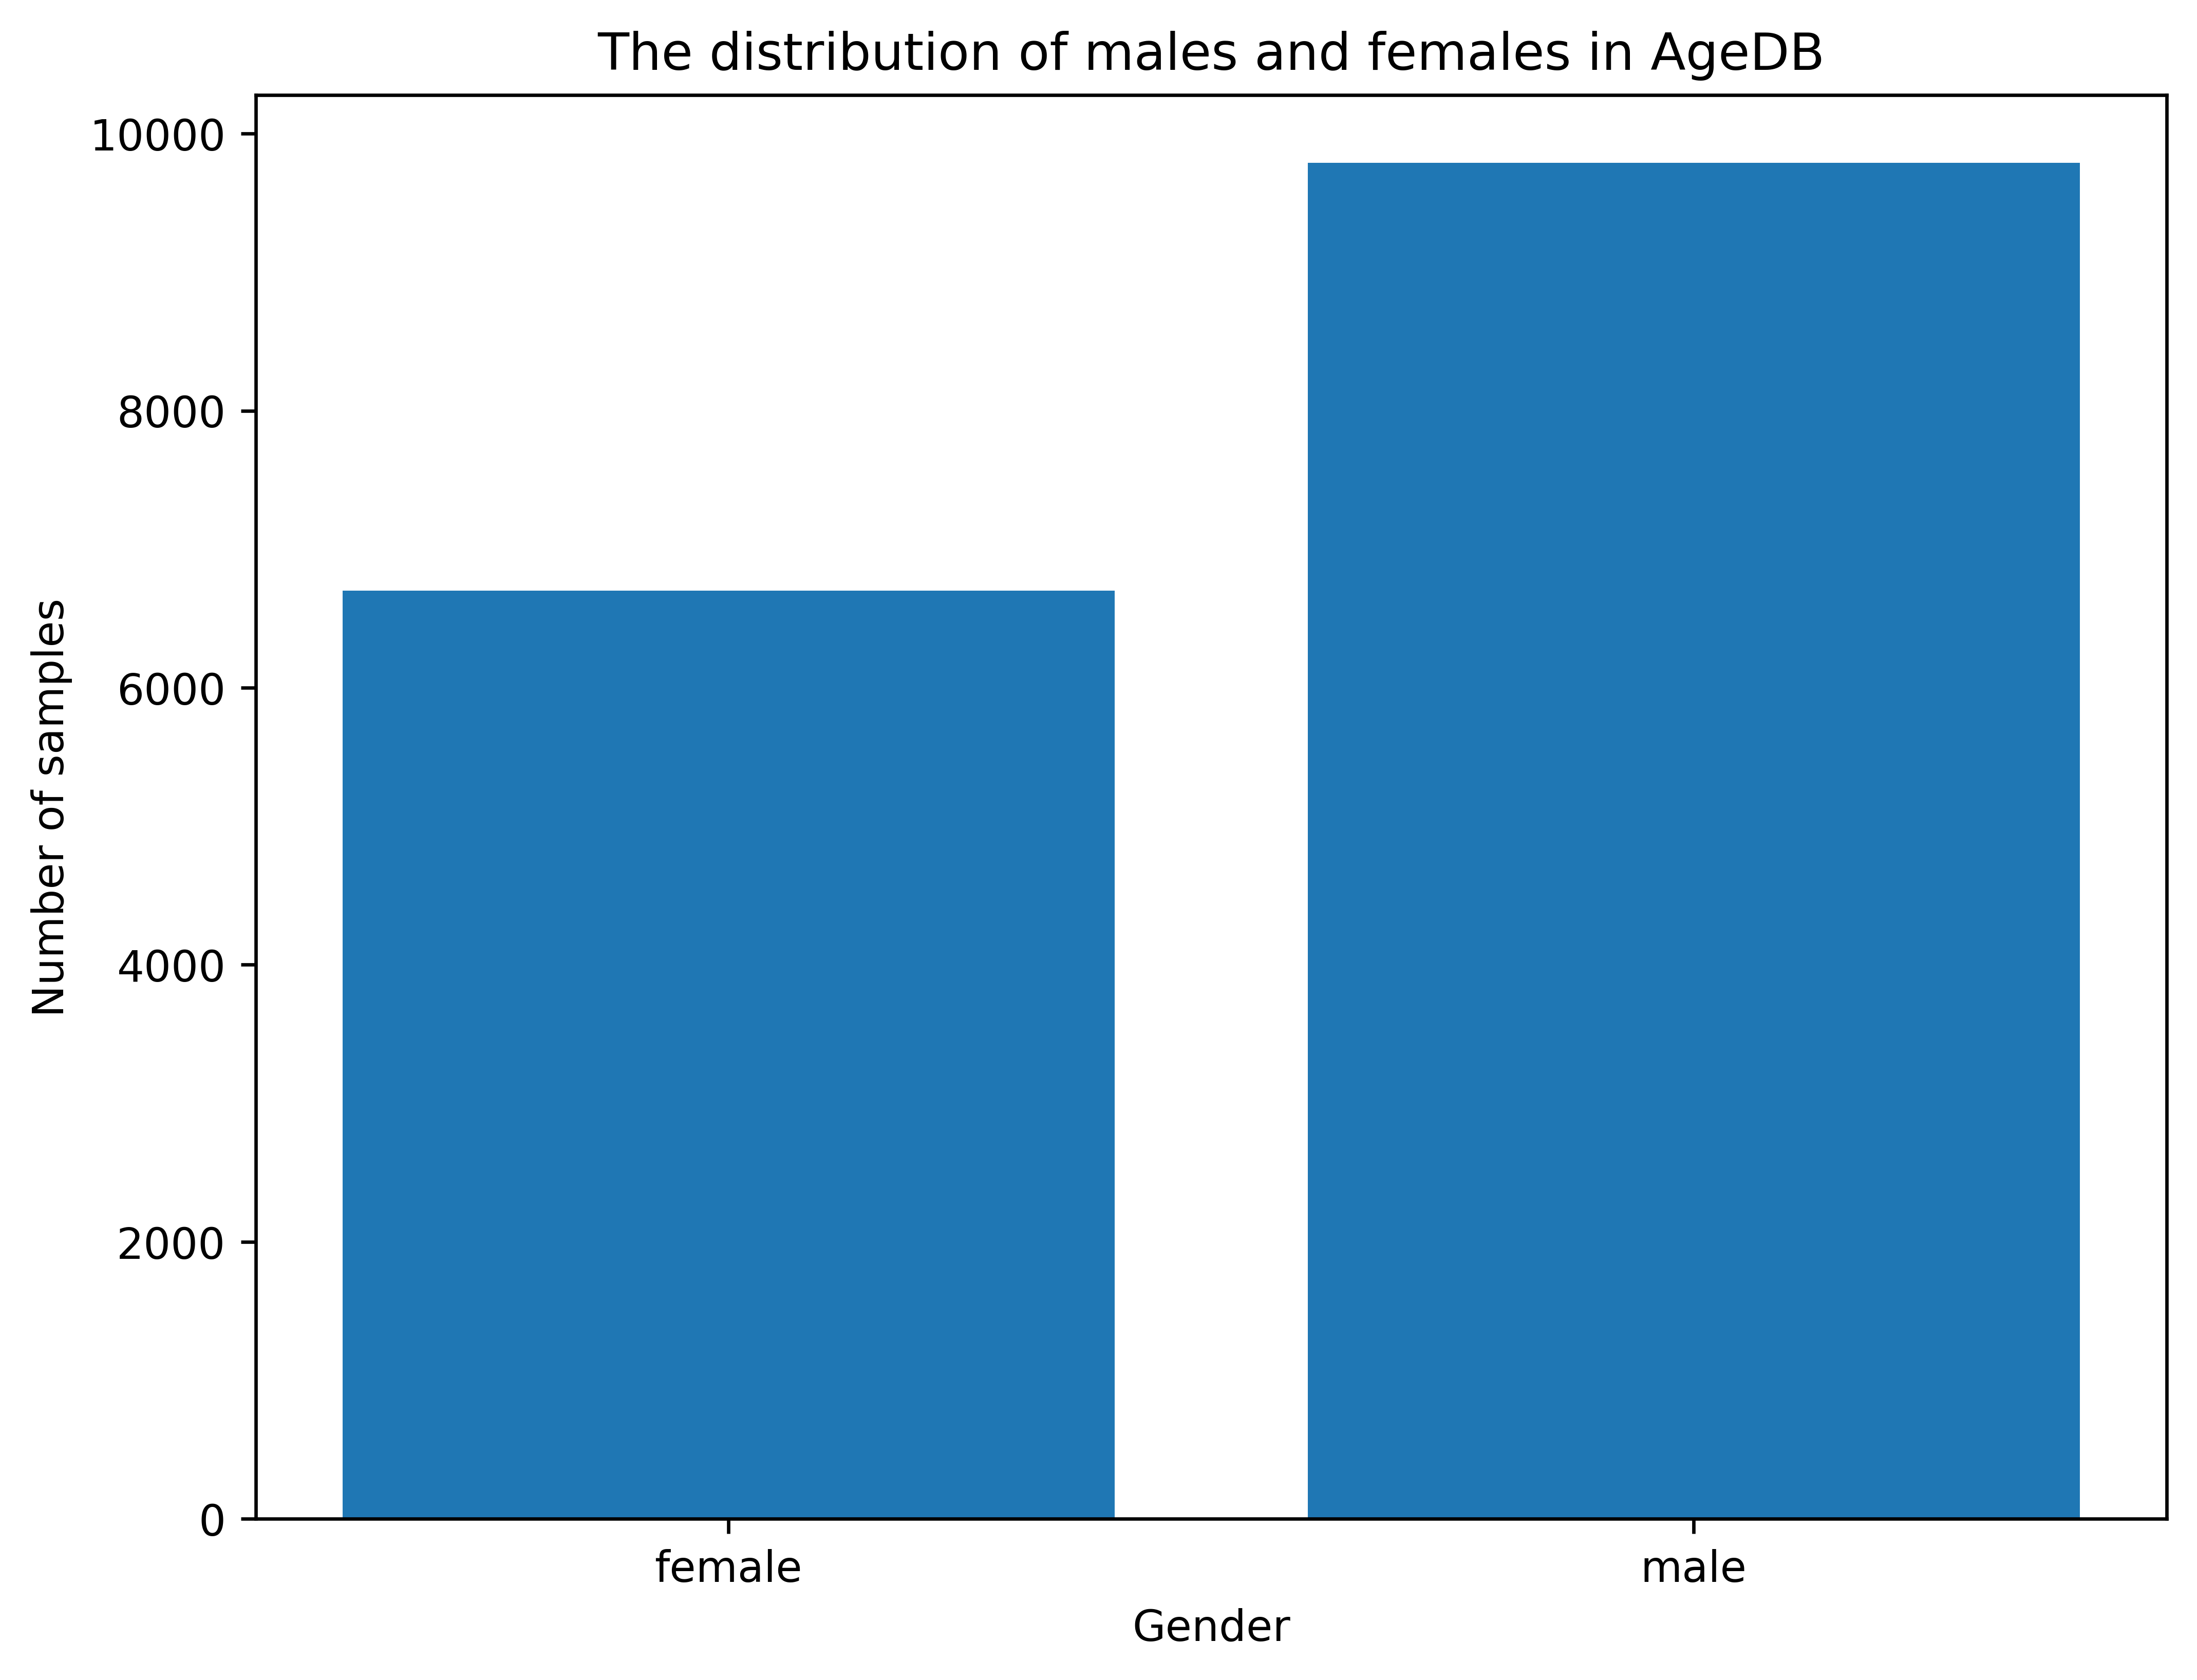

In [ ]:
plt.figure(figsize = (8, 6), dpi = 600)
plt.title('The distribution of males and females in AgeDB')
plt.bar(x = ['female', 'male'], height = counts)
plt.xlabel('Gender')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'AgeDB', 'The distribution of males and females in AgeDB')
)
plt.show()

In [9]:
ages, counts = np.unique(labels_df['age'], return_counts = True)

In [10]:
average_age = sum(ages*counts) / sum(counts)
print(f'The average age in AgeDB is: {average_age}')

The average age in AgeDB is: 46.26122028141679


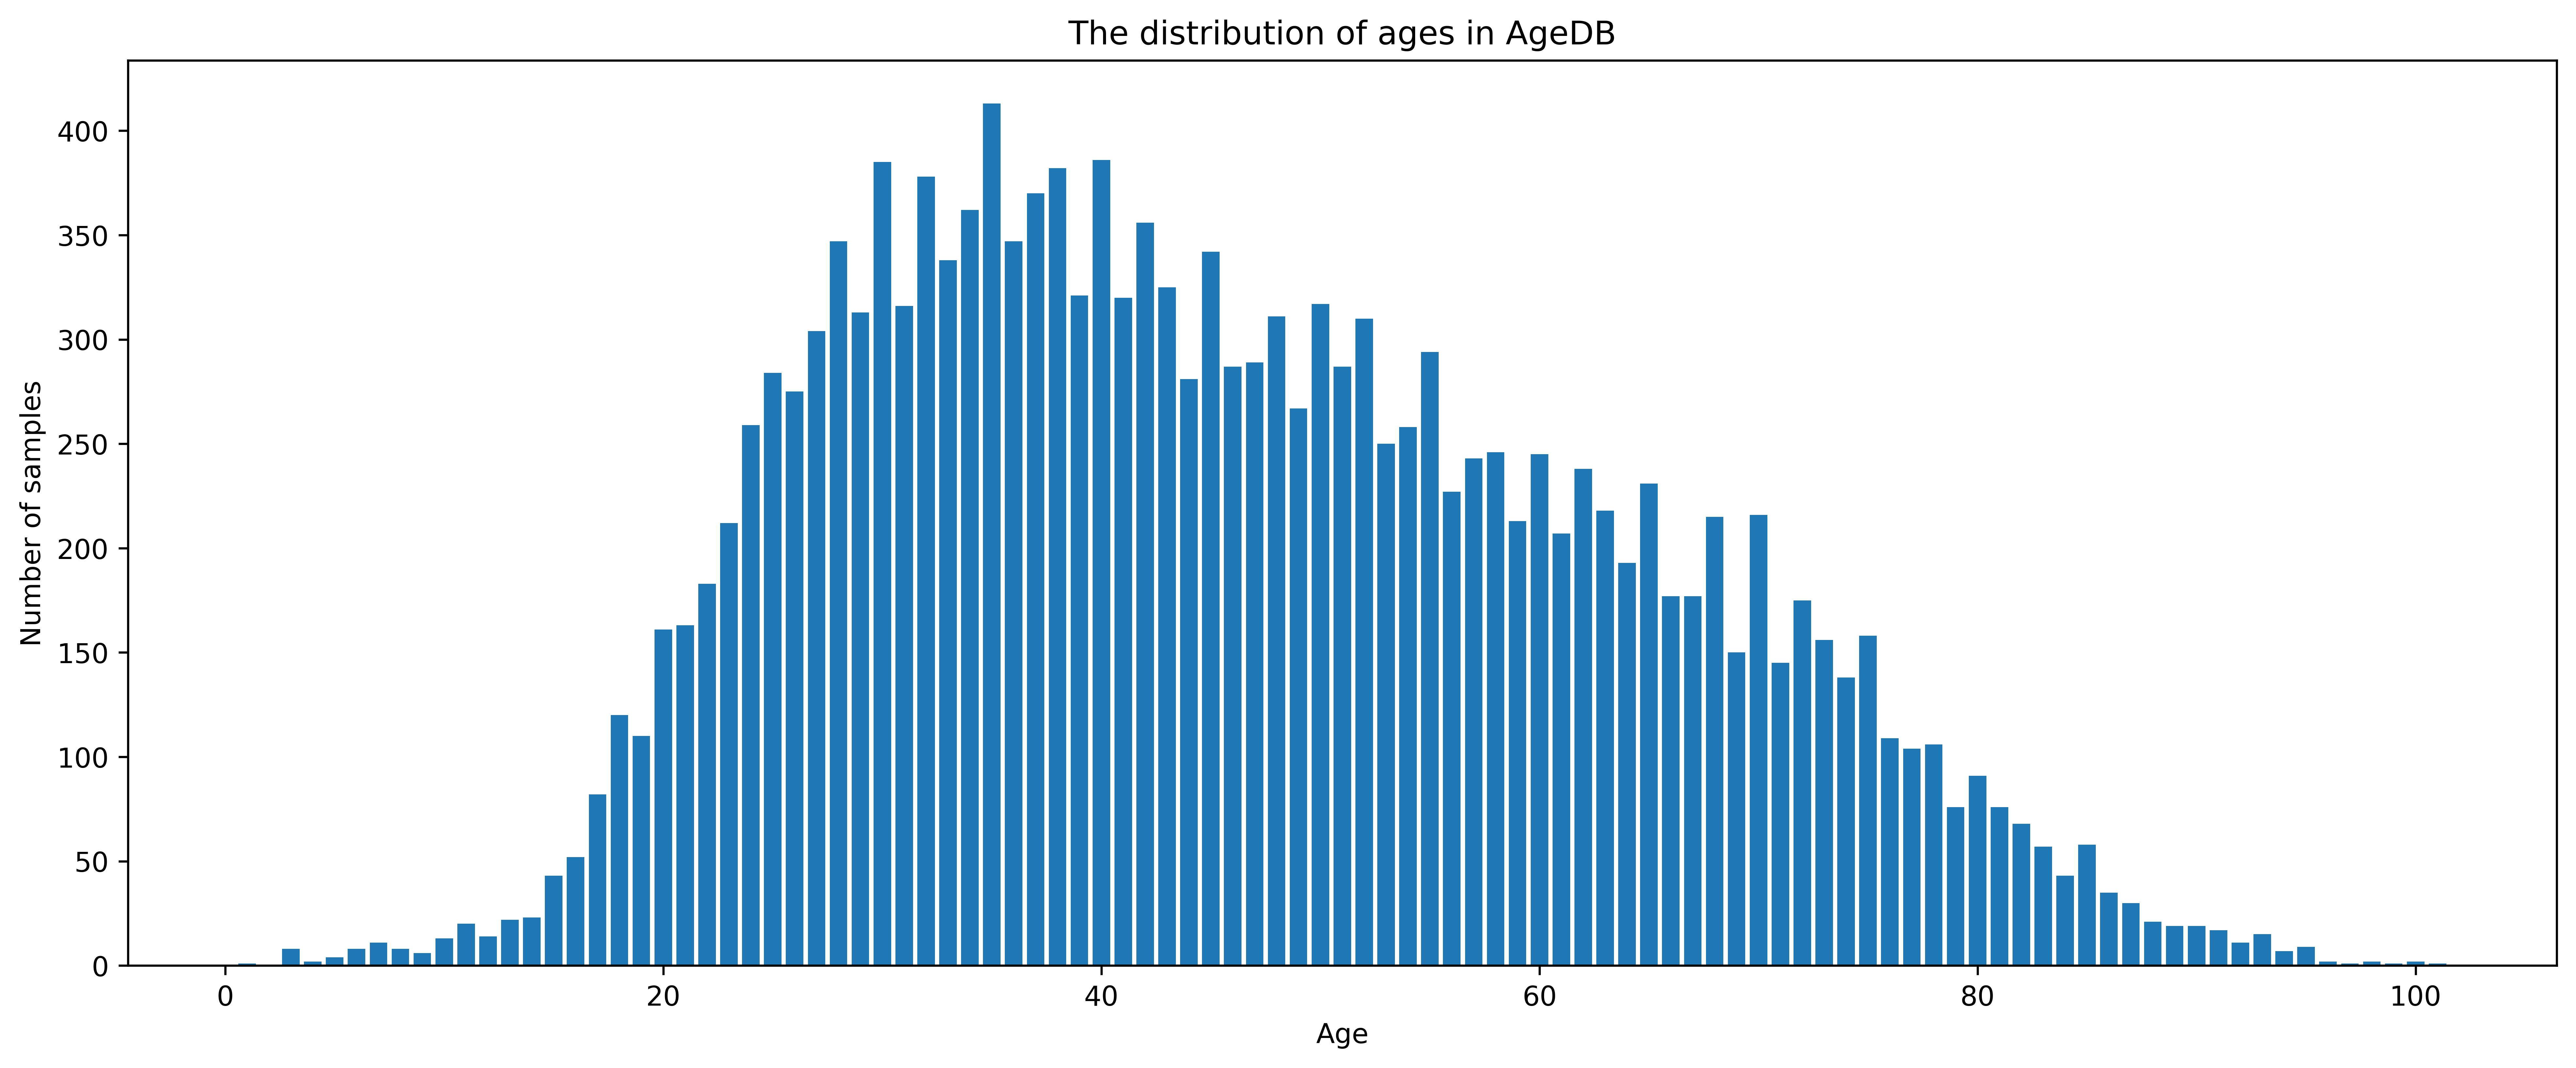

In [11]:
plt.figure(figsize = (16, 6), dpi = 600)
plt.title('The distribution of ages in AgeDB')
plt.bar(ages, counts)
plt.xlabel('Age')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'AgeDB', 'The distribution of Ages in AgeDB')
)
plt.show()

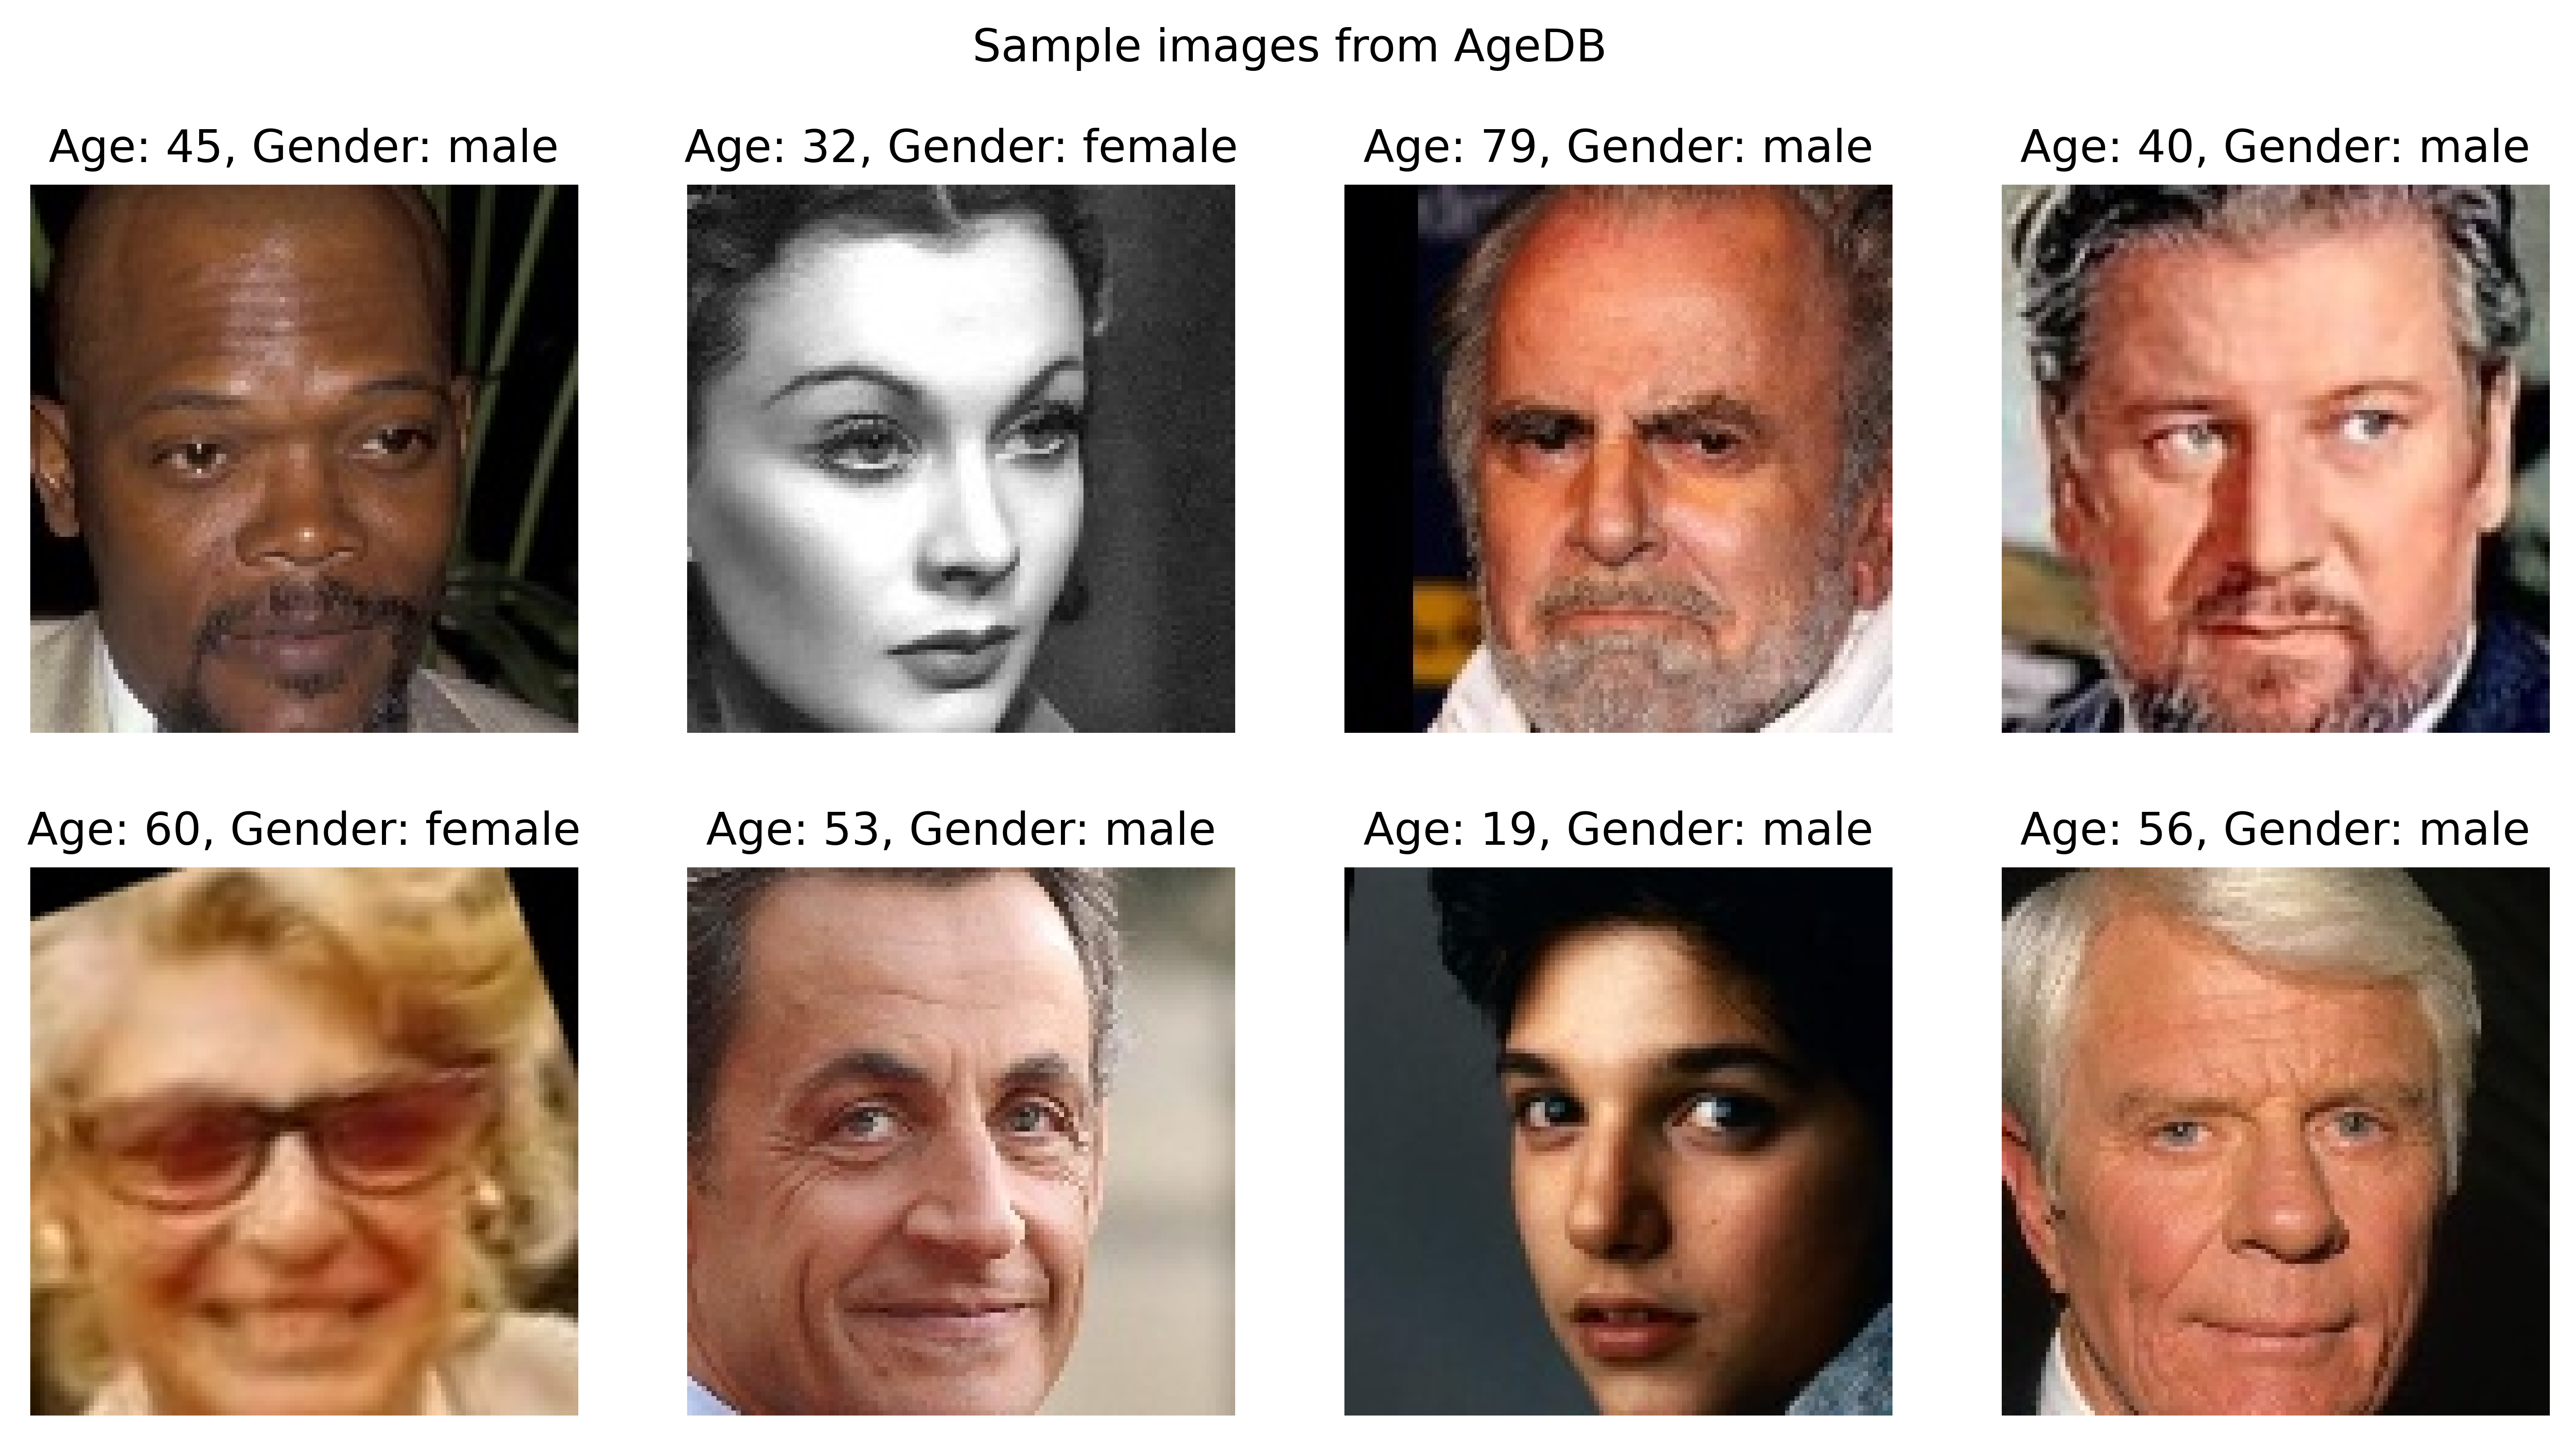

In [17]:
plt.figure(figsize = (12, 6), dpi = 600)
plt.title('Sample images from AgeDB', pad = 30)
plt.axis('off')
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image = plt.imread(
        os.path.join(new_images_path, labels_df['filename'][idx])
    )

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Age: {labels_df['age'][idx]}, Gender: {'male' if labels_df['gender'][idx] else 'female'}')

plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'AgeDB', 'Sample images from AgeDB')
)
plt.show()